In [2]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans

In [3]:
iris = load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

iris_df.sample(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
4,5.0,3.6,1.4,0.2
64,5.6,2.9,3.6,1.3
143,6.8,3.2,5.9,2.3


In [5]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
iris_scaled = scaler.fit_transform(iris_df)
iris_scaled

array([[-9.00681170e-01,  1.01900435e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00, -1.31979479e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.38535265e+00,  3.28414053e-01, -1.39706395e+00,
        -1.31544430e+00],
       [-1.50652052e+00,  9.82172869e-02, -1.28338910e+00,
        -1.31544430e+00],
       [-1.02184904e+00,  1.24920112e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-5.37177559e-01,  1.93979142e+00, -1.16971425e+00,
        -1.05217993e+00],
       [-1.50652052e+00,  7.88807586e-01, -1.34022653e+00,
        -1.18381211e+00],
       [-1.02184904e+00,  7.88807586e-01, -1.28338910e+00,
        -1.31544430e+00],
       [-1.74885626e+00, -3.62176246e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00,  9.82172869e-02, -1.28338910e+00,
        -1.44707648e+00],
       [-5.37177559e-01,  1.47939788e+00, -1.28338910e+00,
        -1.31544430e+00],
       [-1.26418478e+00,  7.88807586e-01, -1.22655167e+00,
      

### kmeans k=3

In [10]:
from sklearn.cluster import KMeans
 
# K-평균 군집화 알고리즘 모델 생성하기
kmeans_3 = KMeans(n_clusters=3, random_state=0)
labels_3 = kmeans_3.fit_predict(iris_scaled)
 
centroids_3 = kmeans_3.cluster_centers_

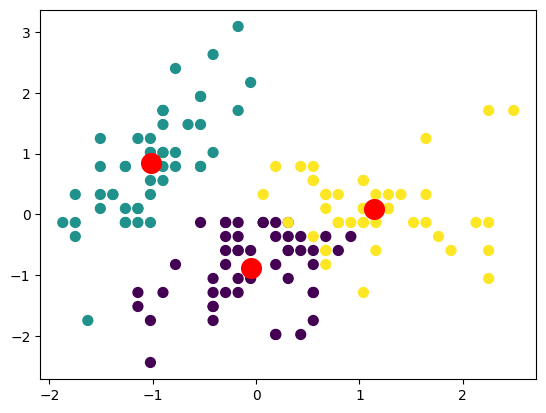

In [11]:
import matplotlib.pyplot as plt 

plt.scatter(iris_scaled[:,0], iris_scaled[:,1], c=labels_3, s=50) 
# 중심점 
plt.scatter(centroids_3[:,0], centroids_3[:,1], c='red', s=200) 

plt.show() 

In [12]:
from sklearn.metrics import silhouette_samples, silhouette_score
 
# 전체 실루엣 점수 평균 계산
silhouette_avg = silhouette_score(iris_scaled, labels_3)
silhouette_avg

0.45994823920518635

In [14]:
# 개별 실루엣 점수
sample_silhouette_values = silhouette_samples(iris_scaled, labels_3)
sample_silhouette_values[:10]
 
# 클러스터별 평균 실루엣 점수 계산
unique_labels = set(labels_3)
silhouette_avg_per_cluster = {}
for label in unique_labels:
    cluster_silhouette_values = sample_silhouette_values[labels_3 == label]
    silhouette_avg_per_cluster[label] = np.mean(cluster_silhouette_values)
   
# 결과 출력
for label, silhouette_avg in silhouette_avg_per_cluster.items():
    print(f'Cluster {label}: Average Silhouette Score = {silhouette_avg}')

Cluster 0: Average Silhouette Score = 0.39337721055814295
Cluster 1: Average Silhouette Score = 0.6363161744392947
Cluster 2: Average Silhouette Score = 0.3473922340262053


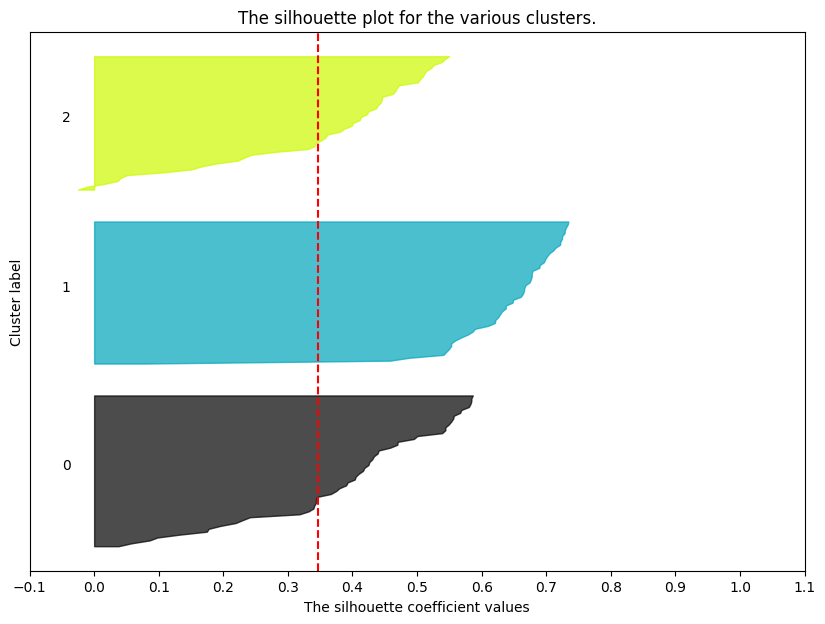

In [16]:
# 실루엣 차트 그리기
fig, ax1 = plt.subplots(figsize=(10, 7))
 
y_lower = 10
for i in range(3): #클러스터 3개
    ith_cluster_silhouette_values = sample_silhouette_values[labels_3 == i]
    ith_cluster_silhouette_values.sort()
   
    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i
 
    color = plt.cm.nipy_spectral(float(i) / 3)
    ax1.fill_betweenx(np.arange(y_lower, y_upper),
                      0, ith_cluster_silhouette_values,
                      facecolor=color, edgecolor=color, alpha=0.7)
 
    ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
 
    y_lower = y_upper + 10  # 다음 클러스터로 이동
 
ax1.set_title("The silhouette plot for the various clusters.")
ax1.set_xlabel("The silhouette coefficient values")
ax1.set_ylabel("Cluster label")
 
ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
ax1.set_yticks([])
ax1.set_xticks(np.arange(-0.1, 1.1, 0.1))
 
plt.show()

### GPT

In [10]:
import pandas as pd
from sklearn.datasets import load_iris

# iris 데이터셋 로드
iris = load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

In [11]:
from sklearn.cluster import KMeans

# K-Means 클러스터링 수행
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(iris_df)
labels = kmeans.labels_

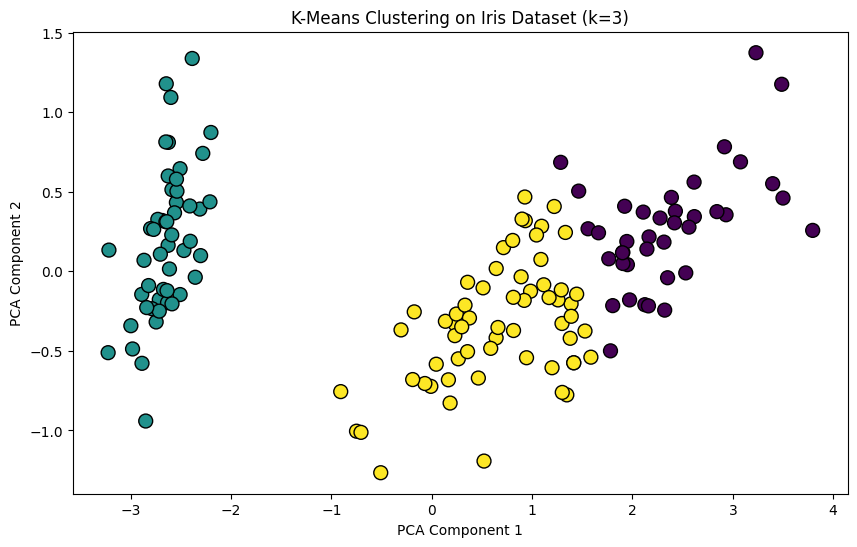

In [18]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# PCA를 사용하여 2차원으로 차원 축소
pca = PCA(n_components=2)
iris_pca = pca.fit_transform(iris_df)

# 시각화
plt.figure(figsize=(10, 6))
plt.scatter(iris_pca[:, 0], iris_pca[:, 1], c=labels, cmap='viridis', marker='o', edgecolor='k', s=100,)
plt.title('K-Means Clustering on Iris Dataset (k=3)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

### kmeans k=2

In [17]:
iris = load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

iris_df.sample(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
18,5.7,3.8,1.7,0.3
146,6.3,2.5,5.0,1.9
2,4.7,3.2,1.3,0.2


In [19]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
iris_scaled = scaler.fit_transform(iris_df)
iris_scaled

array([[-9.00681170e-01,  1.01900435e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00, -1.31979479e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.38535265e+00,  3.28414053e-01, -1.39706395e+00,
        -1.31544430e+00],
       [-1.50652052e+00,  9.82172869e-02, -1.28338910e+00,
        -1.31544430e+00],
       [-1.02184904e+00,  1.24920112e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-5.37177559e-01,  1.93979142e+00, -1.16971425e+00,
        -1.05217993e+00],
       [-1.50652052e+00,  7.88807586e-01, -1.34022653e+00,
        -1.18381211e+00],
       [-1.02184904e+00,  7.88807586e-01, -1.28338910e+00,
        -1.31544430e+00],
       [-1.74885626e+00, -3.62176246e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00,  9.82172869e-02, -1.28338910e+00,
        -1.44707648e+00],
       [-5.37177559e-01,  1.47939788e+00, -1.28338910e+00,
        -1.31544430e+00],
       [-1.26418478e+00,  7.88807586e-01, -1.22655167e+00,
      

In [20]:
from sklearn.cluster import KMeans
 
# K-평균 군집화 알고리즘 모델 생성하기
kmeans_2 = KMeans(n_clusters=2, random_state=0)
labels_2 = kmeans_2.fit_predict(iris_scaled)
 
centroids_2 = kmeans_2.cluster_centers_

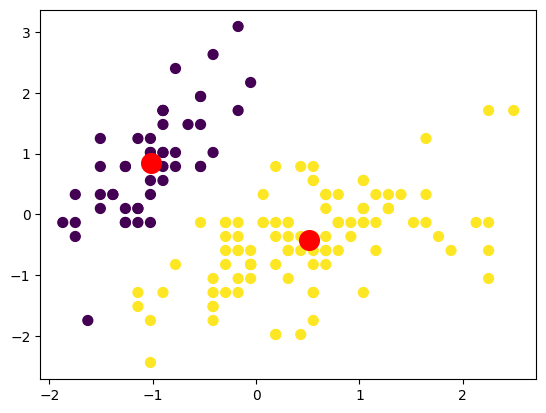

In [21]:
import matplotlib.pyplot as plt 

plt.scatter(iris_scaled[:,0], iris_scaled[:,1], c=labels_2, s=50) 
# 중심점 
plt.scatter(centroids_2[:,0], centroids_2[:,1], c='red', s=200) 

plt.show() 

In [22]:
from sklearn.metrics import silhouette_samples, silhouette_score
 
# 전체 실루엣 점수 평균 계산
silhouette_avg = silhouette_score(iris_scaled, labels_2)
silhouette_avg

0.5817500491982808

In [23]:
# 개별 실루엣 점수
sample_silhouette_values = silhouette_samples(iris_scaled, labels_2)
sample_silhouette_values[:10]
 
# 클러스터별 평균 실루엣 점수 계산
unique_labels = set(labels_2)
silhouette_avg_per_cluster = {}
for label in unique_labels:
    cluster_silhouette_values = sample_silhouette_values[labels_2 == label]
    silhouette_avg_per_cluster[label] = np.mean(cluster_silhouette_values)
   
# 결과 출력
for label, silhouette_avg in silhouette_avg_per_cluster.items():
    print(f'Cluster {label}: Average Silhouette Score = {silhouette_avg}')

Cluster 0: Average Silhouette Score = 0.6807337356696789
Cluster 1: Average Silhouette Score = 0.5322582059625817


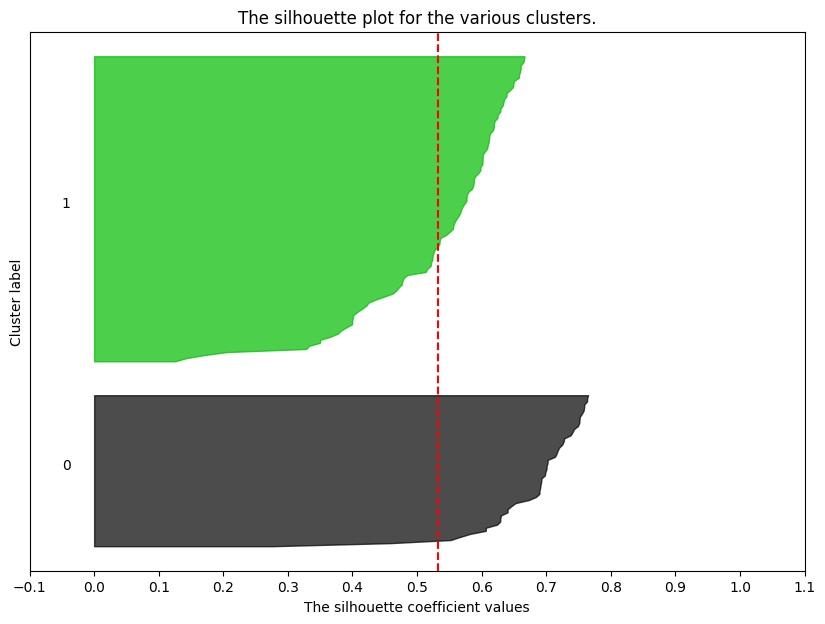

In [26]:
# 실루엣 차트 그리기
fig, ax1 = plt.subplots(figsize=(10, 7))
 
y_lower = 10
for i in range(2): #클러스터 3개
    ith_cluster_silhouette_values = sample_silhouette_values[labels_2 == i]
    ith_cluster_silhouette_values.sort()
   
    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i
 
    color = plt.cm.nipy_spectral(float(i) / 2)
    ax1.fill_betweenx(np.arange(y_lower, y_upper),
                      0, ith_cluster_silhouette_values,
                      facecolor=color, edgecolor=color, alpha=0.7)
 
    ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
 
    y_lower = y_upper + 10  # 다음 클러스터로 이동
 
ax1.set_title("The silhouette plot for the various clusters.")
ax1.set_xlabel("The silhouette coefficient values")
ax1.set_ylabel("Cluster label")
 
ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
ax1.set_yticks([])
ax1.set_xticks(np.arange(-0.1, 1.1, 0.1))
 
plt.show()